In [1]:
import numpy as np
import gym
import time
import matplotlib.pyplot as plt

class Q_Learning:
    def __init__(self, env, alpha, gamma, epsilon, nEpisodes, nBins, lowerB, upperB):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actionNumber = env.action_space.n
        self.nEpisodes = nEpisodes
        self.nBins = nBins
        self.lowerB = lowerB
        self.upperB = upperB

        self.sumRewardsEpisode = []  # Sum of rewards in every learning episode

        # Action Value Function Matrix
        self.QMatrix = np.random.uniform(low=0, high=1, size=(nBins[0], nBins[1], nBins[2], nBins[3], self.actionNumber))

    def return_IndexState(self, state):
        position = state[0]
        velocity = state[1]
        angle = state[2]
        angular_velocity = state[3]

        cartPosBin = np.linspace(self.lowerB[0], self.upperB[0], self.nBins[0])
        cartVeloBin = np.linspace(self.lowerB[1], self.upperB[1], self.nBins[1])
        poleAngleBin = np.linspace(self.lowerB[2], self.upperB[2], self.nBins[2])
        poleAngleVeloBin = np.linspace(self.lowerB[3], self.upperB[3], self.nBins[3])

        indexPos = np.maximum(np.digitize(position, cartPosBin) - 1, 0)
        indexVelo = np.maximum(np.digitize(velocity, cartVeloBin) - 1, 0)
        indexAngle = np.maximum(np.digitize(angle, poleAngleBin) - 1, 0)
        indexAngleVelo = np.maximum(np.digitize(angular_velocity, poleAngleVeloBin) - 1, 0)

        return tuple([indexPos, indexVelo, indexAngle, indexAngleVelo])

    def selectAction(self, state, index):
        # First 500 episodes we select completely random actions to explore
        if index < 500:
            return np.random.choice(self.actionNumber)

        randomNumber = np.random.random()

        # After 7000 episodes we slowly start to decrease the epsilon parameter
        if index > 7000:
            self.epsilon = 0.999 * self.epsilon

        if randomNumber < self.epsilon:
            return np.random.choice(self.actionNumber)
        else:
            # Choose the action with the highest Q-value or random if multiple max values
            return np.random.choice(np.where(self.QMatrix[self.return_IndexState(state)] == 
                                             np.max(self.QMatrix[self.return_IndexState(state)]))[0])

    def simulateEpisode(self):
        for i in range(self.nEpisodes):
            rewardsEpisode = []

            # Resetting the environment at the start of every episode
            (stateS, _) = self.env.reset()
            stateS = list(stateS)

            print("Simulating Episode ", i)

            terminalState = False

            while not terminalState:
                stateSIndex = self.return_IndexState(stateS)
                actionA = self.selectAction(stateS, i)

                (stateSPrime, reward, terminalState, _, _) = self.env.step(actionA)
                rewardsEpisode.append(reward)
                stateSPrime = list(stateSPrime)
                stateSPrimeIndex = self.return_IndexState(stateSPrime)

                QmaxPrime = np.max(self.QMatrix[stateSPrimeIndex])

                if not terminalState:
                    error = reward + self.gamma * QmaxPrime - self.QMatrix[stateSIndex + (actionA,)]
                    self.QMatrix[stateSIndex + (actionA,)] += self.alpha * error
                else:
                    error = reward - self.QMatrix[stateSIndex + (actionA,)]
                    self.QMatrix[stateSIndex + (actionA,)] += self.alpha * error

                stateS = stateSPrime

            print("Sum of rewards: ", np.sum(rewardsEpisode))
            self.sumRewardsEpisode.append(np.sum(rewardsEpisode))

    def simulateLearnedStrategy(self):
        env1 = gym.make('CartPole-v1', render_mode='human')
        (currentState, _) = env1.reset()

        env1.render()
        timeSteps = 1000

        obtainedRewards = []

        for i in range(timeSteps):
            print(i)

            actionInStateS = np.random.choice(np.where(self.QMatrix[self.return_IndexState(currentState)] == 
                                                       np.max(self.QMatrix[self.return_IndexState(currentState)]))[0])
            currentState, reward, terminated, truncated, info = env1.step(actionInStateS)
            obtainedRewards.append(reward)
            time.sleep(0.05)
            if terminated:
                time.sleep(1)
                break
        return obtainedRewards, env1

    def simulateRandomStrategy(self):
        env2 = gym.make('CartPole-v1', render_mode='human')
        (currentState, _) = env2.reset()

        env2.render()
        episodeNumber = 100
        timeSteps = 1000
        sumRewardsEpisode = []

        for i in range(episodeNumber):
            rewardsSingleEp = []
            initial_state = env2.reset()
            print(i)

            for j in range(timeSteps):
                random_action = env2.action_space.sample()
                observation, reward, terminated, truncated, info = env2.step(random_action)

                rewardsSingleEp.append(reward)
                if terminated:
                    break

            sumRewardsEpisode.append(np.sum(rewardsSingleEp))
        return sumRewardsEpisode, env2


In [3]:
# Driver code
    
import matplotlib.pyplot as plt

env=gym.make('CartPole-v1')

(state,_)=env.reset()
upperB=env.observation_space.high
lowerB=env.observation_space.low

cartVeloMin=-3
cartVeloMax=3

poleAngleVeloMin=-10
poleAngleVeloMax=10

upperB[1]=cartVeloMax
upperB[3]=poleAngleVeloMax
lowerB[1]=cartVeloMin
lowerB[3]=poleAngleVeloMin

nBinsPos=30
nBinsVelo=30
nBinsAngle=30
nBinsAngleVelo=30

nBins=[nBinsPos,nBinsVelo,nBinsAngle,nBinsAngleVelo]

alpha=0.1
gamma=0.9
epsilon=0.2
nEpisodes=750

Q1=Q_Learning(env,alpha,gamma,epsilon,nEpisodes,nBins,lowerB,upperB)

Q1.simulateEpisode()



Simulating Episode  0
Sum of rewards:  37.0
Simulating Episode  1
Sum of rewards:  30.0
Simulating Episode  2
Sum of rewards:  53.0
Simulating Episode  3
Sum of rewards:  22.0
Simulating Episode  4
Sum of rewards:  17.0
Simulating Episode  5
Sum of rewards:  19.0
Simulating Episode  6
Sum of rewards:  12.0
Simulating Episode  7
Sum of rewards:  17.0
Simulating Episode  8
Sum of rewards:  15.0
Simulating Episode  9
Sum of rewards:  23.0
Simulating Episode  10
Sum of rewards:  19.0
Simulating Episode  11
Sum of rewards:  38.0
Simulating Episode  12
Sum of rewards:  12.0
Simulating Episode  13
Sum of rewards:  14.0
Simulating Episode  14
Sum of rewards:  14.0
Simulating Episode  15
Sum of rewards:  15.0
Simulating Episode  16
Sum of rewards:  14.0
Simulating Episode  17
Sum of rewards:  15.0
Simulating Episode  18
Sum of rewards:  12.0
Simulating Episode  19
Sum of rewards:  12.0
Simulating Episode  20
Sum of rewards:  14.0
Simulating Episode  21
Sum of rewards:  36.0
Simulating Episode  

In [ ]:
for i in range(100):
    (obtainedRewardsOptimal,env1)=Q1.simulateLearnedStrategy()

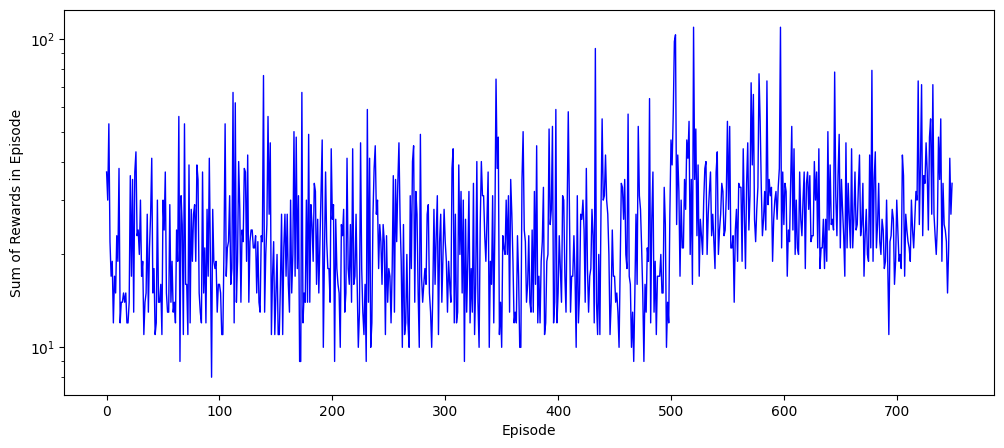

In [4]:
plt.figure(figsize=(12,5))
plt.plot(Q1.sumRewardsEpisode,color='blue',linewidth=1)
plt.xlabel('Episode')
plt.ylabel("Sum of Rewards in Episode")
plt.yscale('log')
plt.savefig('convergence.png')
plt.show()

# env1.close
# np.sum(obtainedRewardsOptimal)

In [5]:
(obtainedRewardsRandom,env2)=Q1.simulateRandomStrategy()
env2.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


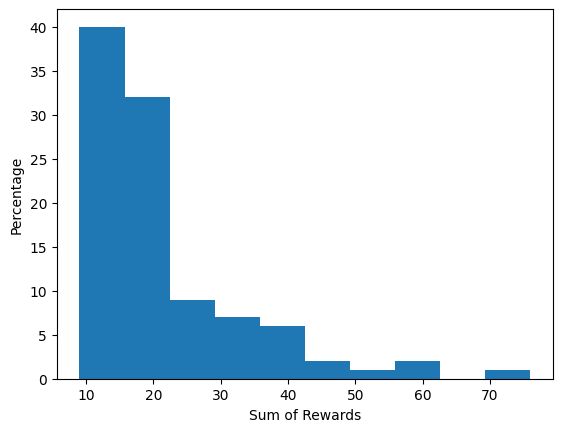

In [6]:
plt.hist(obtainedRewardsRandom)
plt.xlabel('Sum of Rewards')
plt.ylabel("Percentage")
plt.savefig('histogram.png')
plt.show()

In [8]:
(obtainedRewardsOptimal,env1)=Q1.simulateLearnedStrategy()
env1.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
